**Procesamiento de datos con _python_**
-
---

In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing

#### **Transformaciones lineales**

In [5]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]
# raw.sample(2)

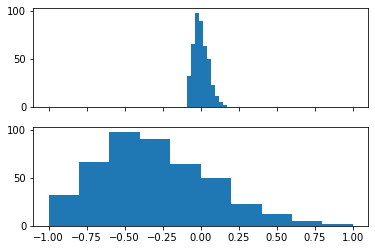

In [29]:
# reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw-min_raw)/(max_raw-min_raw)
fig, axs = plt.subplots(2, 1, sharex=True)
# print(axs)
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [20]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [46]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw:\t{}'.format(raw_time))
print('train scaled:\t{}'.format(scaled_time))

train raw:	0.03844960000060382
train scaled:	0.03514489999724901


+ _max-min_: mejor para datos uniformemente distribuidos
+ _z-score_: mejor para datos distribuidos 'normalmente'

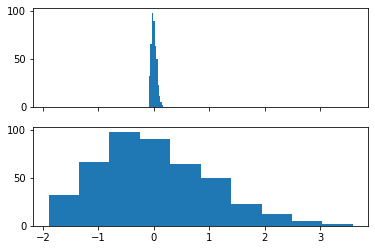

In [18]:
## z-score
mu = np.mean(raw)
std = np.std(raw)
var = np.var(raw)
# mu, std, var
z_score = (raw - mu)/std

fig1, ax1 = plt.subplots(2, 1, sharex=True)
ax1[0].hist(raw)
ax1[1].hist(z_score)
plt.show()
def train_zscore():
    linear_model.LinearRegression().fit(z_score, y)

In [23]:
raw_time = timeit.timeit(train_raw, number = 100)
z_score_timed = timeit.timeit(train_zscore, number = 100)
print('train raw:\t{}'.format(raw_time))
print('train z-score:\t{}'.format(z_score_timed))

train raw:	0.03766949999771896
train z-score:	0.03549939999720664


#### **Transformaciones no lineales**

In [31]:
df = pd.read_csv('./resources/cars.csv')

<AxesSubplot:>

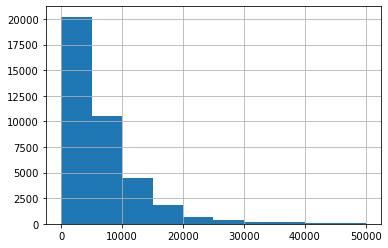

In [4]:
df.price_usd.hist()
### Sesgado

<AxesSubplot:>

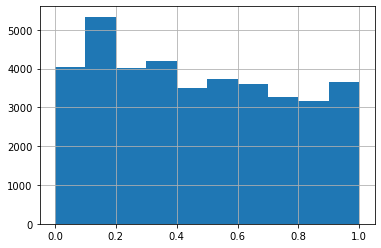

In [33]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

**Transformando con _sklearn_**


[Documentacion](https://scikit-learn.org/stable/modules/preprocessing.html)

(array([20218., 10523.,  4432.,  1821.,   694.,   377.,   168.,   177.,
           68.,    53.]),
 array([1.00000e+00, 5.00090e+03, 1.00008e+04, 1.50007e+04, 2.00006e+04,
        2.50005e+04, 3.00004e+04, 3.50003e+04, 4.00002e+04, 4.50001e+04,
        5.00000e+04]),
 <BarContainer object of 10 artists>)

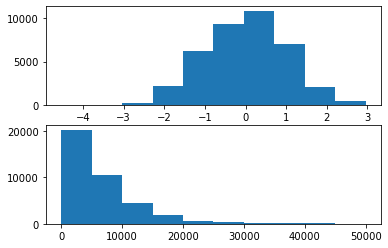

In [32]:
fig, ax = plt.subplots(2,1, sharex=False)
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
ad = pt.fit_transform(df[['price_usd']].values)
ad
ax[0].hist(ad)
ax[1].hist(df.price_usd, bins=10)

In [23]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

(array([7482., 6870., 5763., 4240., 3568., 2795., 1838., 1465., 1144.,
         784.,  592.,  444.,  277.,  239.,  192.,  149.,  137.,   84.,
          52.,   56.,   68.,   67.,   50.,   57.,   26.,   20.,   20.,
          14.,   24.,   14.]),
 array([8.25599122e-03, 1.68222242e+03, 3.36443658e+03, 5.04665074e+03,
        6.72886490e+03, 8.41107907e+03, 1.00932932e+04, 1.17755074e+04,
        1.34577216e+04, 1.51399357e+04, 1.68221499e+04, 1.85043640e+04,
        2.01865782e+04, 2.18687924e+04, 2.35510065e+04, 2.52332207e+04,
        2.69154348e+04, 2.85976490e+04, 3.02798632e+04, 3.19620773e+04,
        3.36442915e+04, 3.53265057e+04, 3.70087198e+04, 3.86909340e+04,
        4.03731481e+04, 4.20553623e+04, 4.37375765e+04, 4.54197906e+04,
        4.71020048e+04, 4.87842190e+04, 5.04664331e+04]),
 <BarContainer object of 30 artists>)

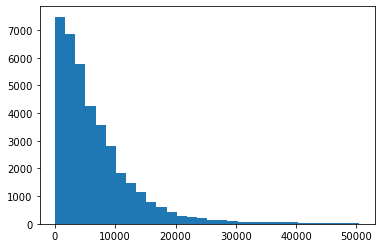

In [37]:
# df[['price_usd']].values
rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example

X_chisq = rng.chisquare(df=df[['price_usd']].values)

fig, axes = plt.subplots()
axes.hist(X_chisq, bins=30)